In [214]:
import numpy as np
import json
import cv2
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline
import matplotlib.pyplot as plt

In [220]:
loads = json.load(open('../kinect_calib.json', 'r'))
intr, dist, rvecs, tvecs = [np.array(load) for load in loads]
intr, dist

(array([[1052.0696,    0.    ,  953.6879],
        [   0.    , 1047.3189,  541.5928],
        [   0.    ,    0.    ,    1.    ]]),
 array([[ 0.0818, -0.1728,  0.0003,  0.0003,  0.0876]]))

In [216]:
GRID_Y_NUM, GRID_X_NUM = 5, 7
objp = np.zeros((GRID_Y_NUM*GRID_X_NUM,3), np.float32)
objp[:,:2] = np.mgrid[0:GRID_X_NUM,0:GRID_Y_NUM].T.reshape(-1,2)

In [217]:
def eulerAnglesToRotationMatrix(theta):
    R_x = np.array([[1,         0,                  0                   ],
                    [0,         np.cos(theta[0]), -np.sin(theta[0]) ],
                    [0,         np.sin(theta[0]), np.cos(theta[0])  ]
                    ])       
    R_y = np.array([[np.cos(theta[1]),    0,      np.sin(theta[1])  ],
                    [0,                     1,      0                   ],
                    [-np.sin(theta[1]),   0,      np.cos(theta[1])  ]
                    ])
    R_z = np.array([[np.cos(theta[2]),    -np.sin(theta[2]),    0],
                    [np.sin(theta[2]),    np.cos(theta[2]),     0],
                    [0,                     0,                      1]
                    ])
    return np.dot(R_z, np.dot( R_y, R_x ))

In [235]:
im = cv2.imread('../calibration_images/grid_calib_pass_2/grid_calib_11.png')[..., 2::-1]

(3, 8, 1915, 1064)


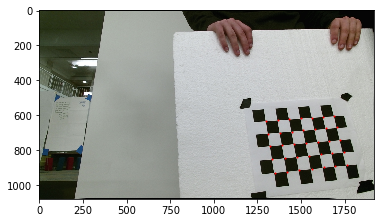

In [236]:
h,  w = im.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(intr,dist,(w,h),1,(w,h))
print(roi)
dst = cv2.undistort(im, intr, dist, None, newcameramtx)

plt.imshow(dst)

rot = eulerAnglesToRotationMatrix(rvecs[10].flatten())
camera_homog = np.matmul(newcameramtx, np.matmul(rot, objp.T) + tvecs[10])
uv_coords = (camera_homog[:2] / camera_homog[2:3]).T

plt.scatter(uv_coords[:, 0], uv_coords[:, 1], s=1, c='r')

In [204]:
(np.matmul(rot.T, objp.T) + tvecs[0])

array([[-5.3956, -4.4125, -3.4294, -2.4463, -1.4632, -0.4801,  0.5031,
        -5.5773, -4.5942, -3.6111, -2.628 , -1.6448, -0.6617,  0.3214,
        -5.759 , -4.7759, -3.7927, -2.8096, -1.8265, -0.8434,  0.1397,
        -5.9406, -4.9575, -3.9744, -2.9913, -2.0082, -1.0251, -0.042 ,
        -6.1223, -5.1392, -4.1561, -3.173 , -2.1899, -1.2068, -0.2236],
       [-4.9657, -4.7931, -4.6205, -4.4479, -4.2754, -4.1028, -3.9302,
        -4.0053, -3.8327, -3.6601, -3.4876, -3.315 , -3.1424, -2.9698,
        -3.0449, -2.8724, -2.6998, -2.5272, -2.3546, -2.182 , -2.0094,
        -2.0846, -1.912 , -1.7394, -1.5668, -1.3942, -1.2216, -1.049 ,
        -1.1242, -0.9516, -0.779 , -0.6064, -0.4338, -0.2612, -0.0887],
       [14.4776, 14.5384, 14.5993, 14.6601, 14.721 , 14.7818, 14.8427,
        14.6889, 14.7498, 14.8106, 14.8715, 14.9323, 14.9931, 15.054 ,
        14.9003, 14.9611, 15.022 , 15.0828, 15.1436, 15.2045, 15.2653,
        15.1116, 15.1724, 15.2333, 15.2941, 15.355 , 15.4158, 15.4767,
    